In [1]:
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import argparse
import pickle
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


plt.style.use('ggplot')
plt.figure(figsize=(12,8), dpi= 100)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

<Figure size 1200x800 with 0 Axes>

In [7]:
assets_df = pd.read_csv("../data/clean_data/assets_2021-07-08.csv", index_col=0)
assets_df.index = [datetime.strptime(dt,"%Y-%m-%d").date() for dt in assets_df.index]
assets_df.drop(["compound", "c_r_e_a_m_-finance", "definer", "dydx", "nexo", "celsius"], axis=1, inplace=True)

lend_rates_df = pd.read_csv("../data/clean_data/lend_rates_2021-07-08.csv", index_col=0)
lend_rates_df.index = [datetime.strptime(dt,"%Y-%m-%d").date() for dt in lend_rates_df.index]
lend_rates_df = pd.merge(lend_rates_df, assets_df[["bitcoin"]], left_index=True, right_index=True, how="inner")
assets_df.head(10)

,bitcoin,ethereum,cardano,monero,litecoin,dogecoin,chainlink,ethereum-classic,tether,ripple,neo,eos,tron
2018-10-12,6234.367641,192.001084,0.071003,102.323932,51.302149,0.005058,0.309131,9.187471,0.998606,0.382766,15.561041,5.111751,0.021085
2018-10-13,6259.980312,194.534550,0.072269,102.562065,52.518679,0.005168,0.311240,9.363996,0.998359,0.402022,15.638773,5.157928,0.021999
2018-10-14,6278.281336,196.707533,0.072766,103.279257,52.989528,0.005191,0.314812,9.437160,0.998150,0.408726,15.738953,5.203898,0.022604
2018-10-15,6290.849692,196.610325,0.072494,102.824114,52.862561,0.005199,0.318720,9.449719,0.997618,0.407852,15.749898,5.202798,0.022907
2018-10-16,6364.654855,199.728874,0.073138,103.541633,53.425556,0.005233,0.323756,9.542887,0.995206,0.416886,15.901272,5.274874,0.023397
2018-10-17,6409.733324,201.848109,0.073782,104.253571,53.679325,0.005212,0.330491,9.597339,0.993090,0.426707,16.025854,5.313855,0.023610
2018-10-18,6442.020254,203.167335,0.074494,104.845168,53.834580,0.005137,0.338057,9.656101,0.992463,0.433734,16.168846,5.343696,0.023761
2018-10-19,6482.469318,204.926187,0.075179,105.020905,54.054260,0.005050,0.347887,9.727990,0.990898,0.444975,16.332431,5.385791,0.024247
2018-10-20,6510.788573,205.913080,0.075590,105.347986,54.008449,0.004945,0.355110,9.748316,0.990405,0.450174,16.465810,5.410785,0.024437
2018-10-21,6541.902197,206.745737,0.076091,105.285962,54.007910,0.004856,0.362066,9.776025,0.989778,0.456185,16.594812,5.430767,0.024519


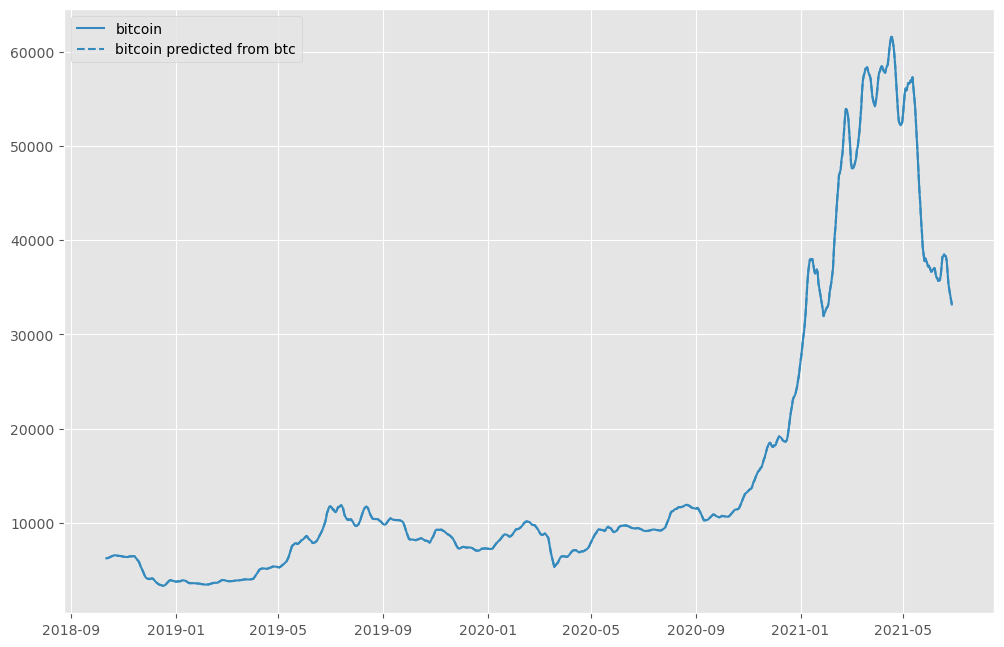

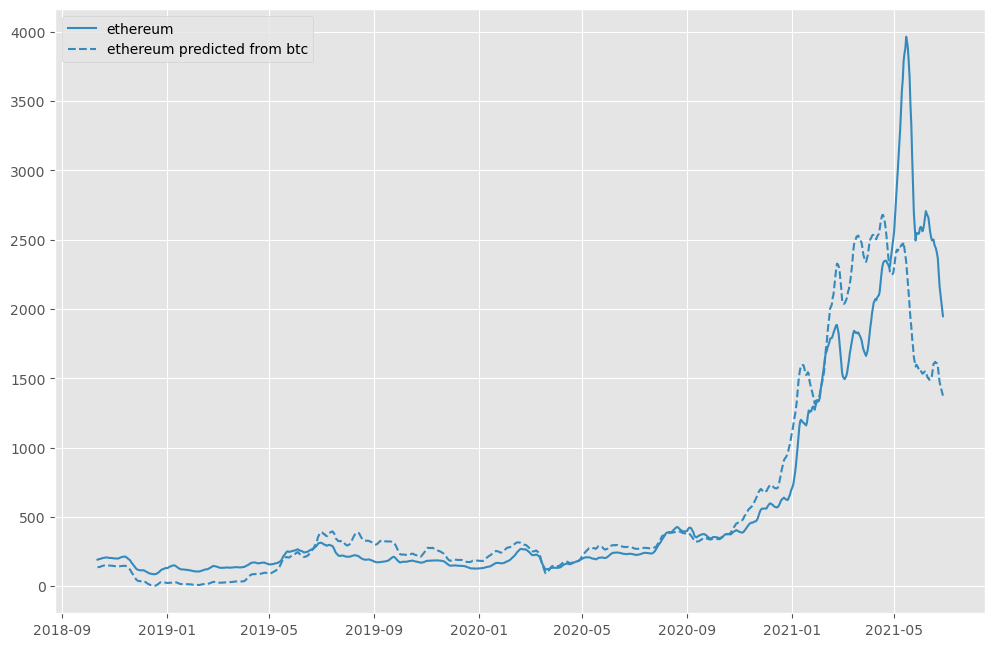

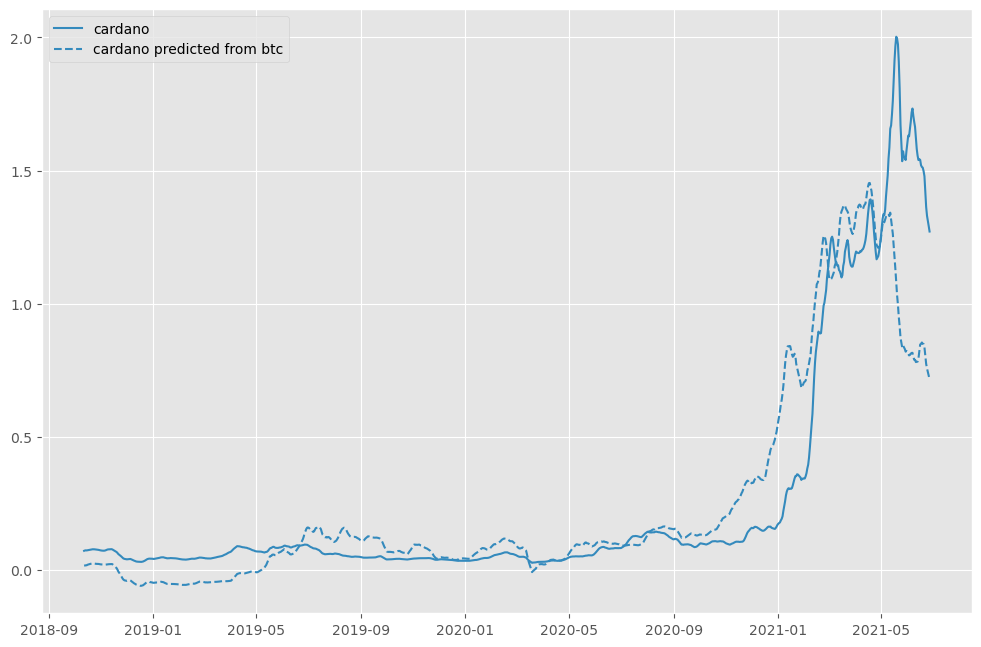

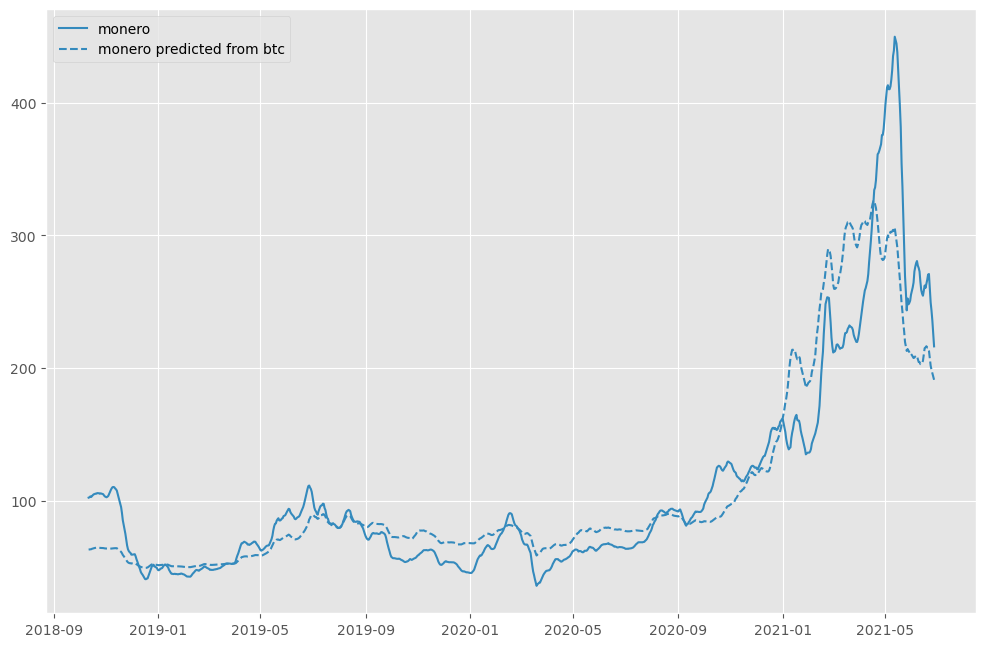

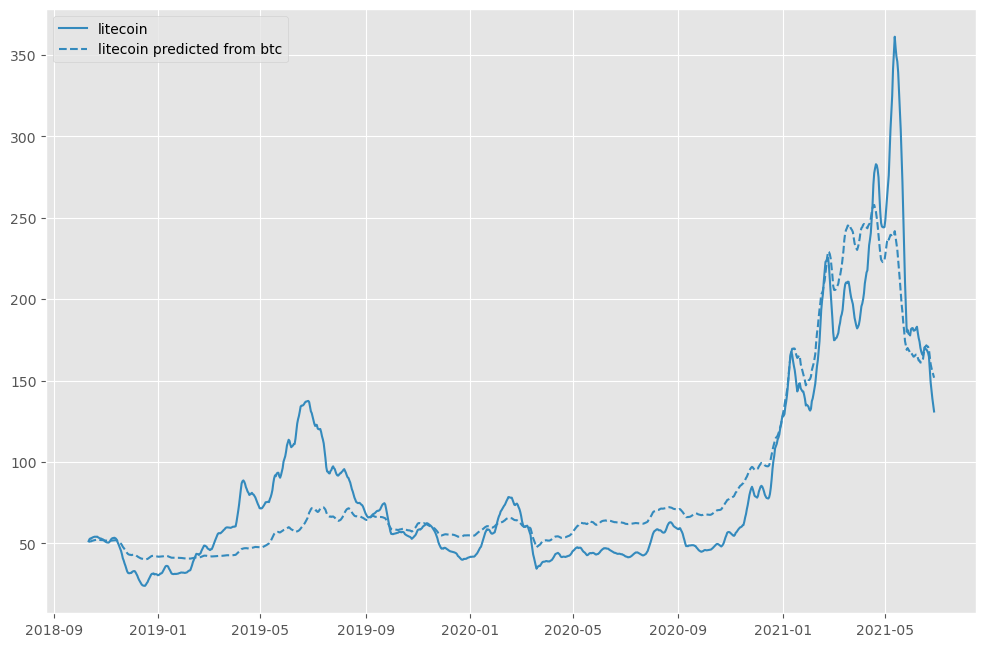

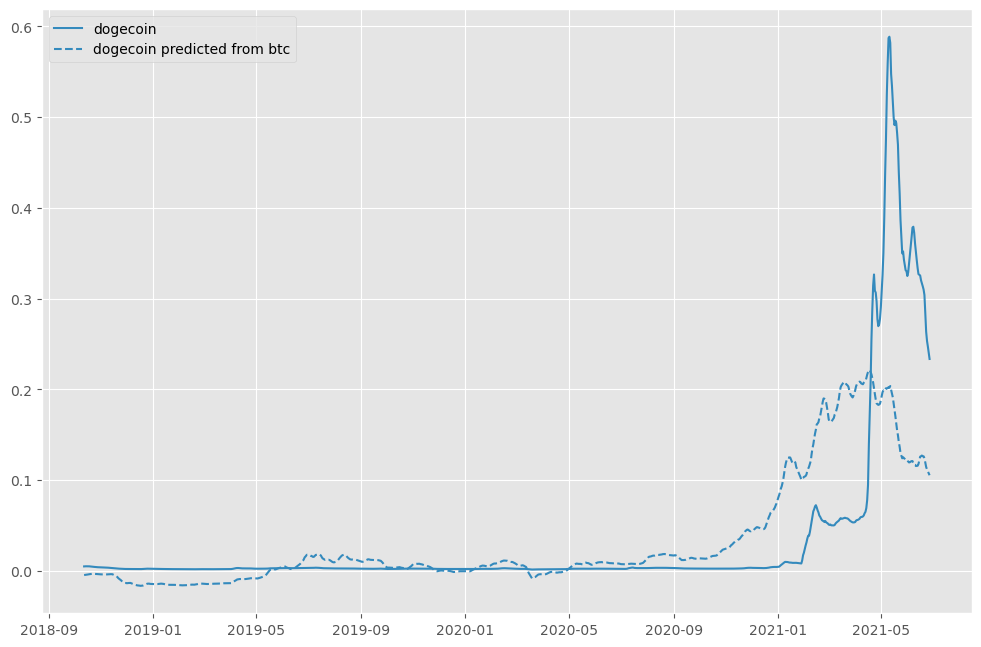

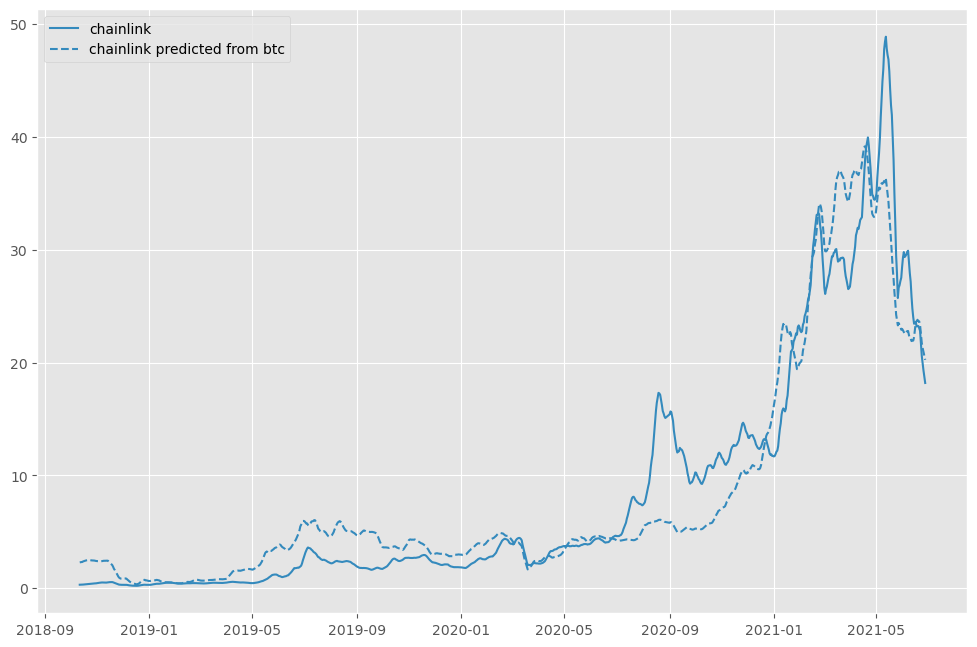

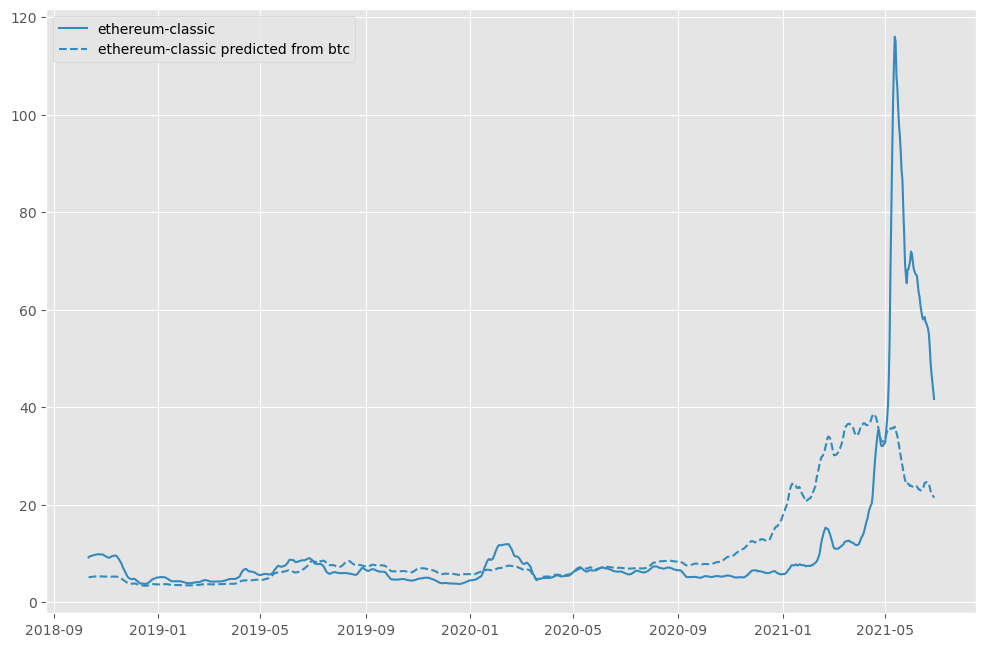

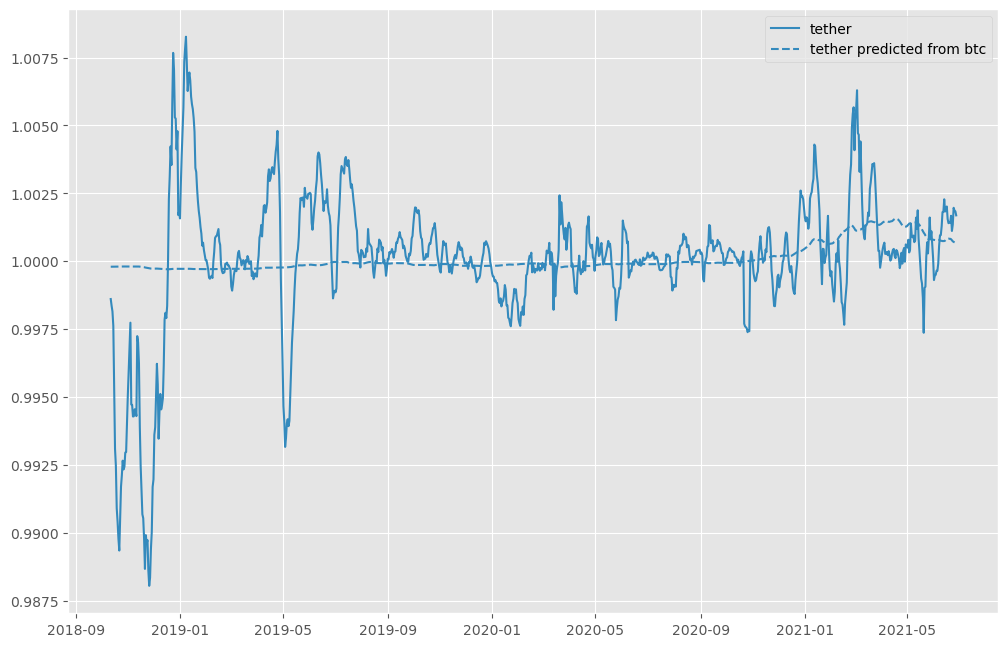

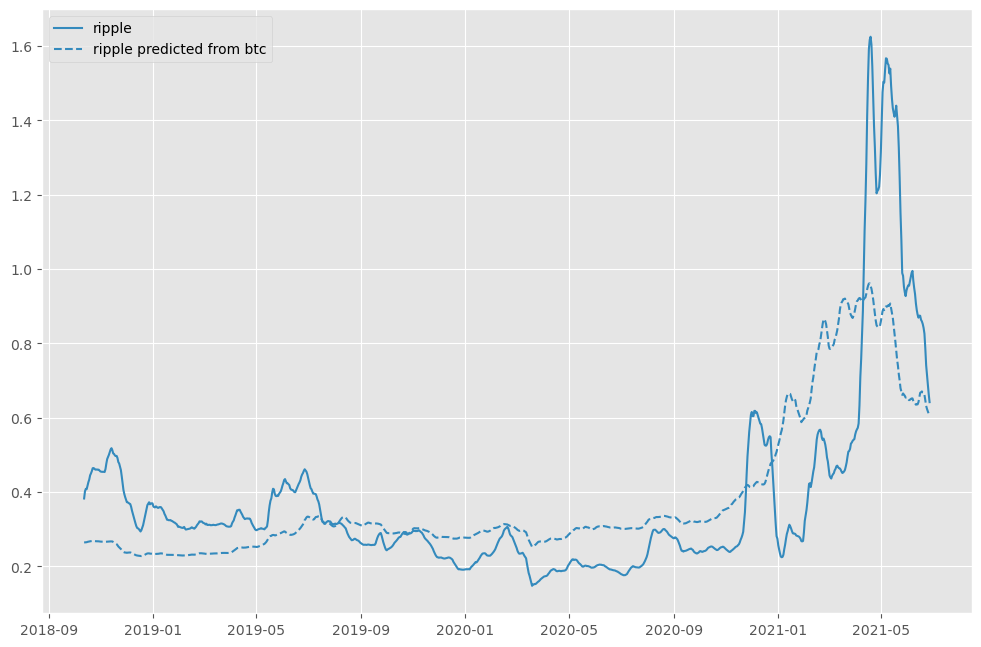

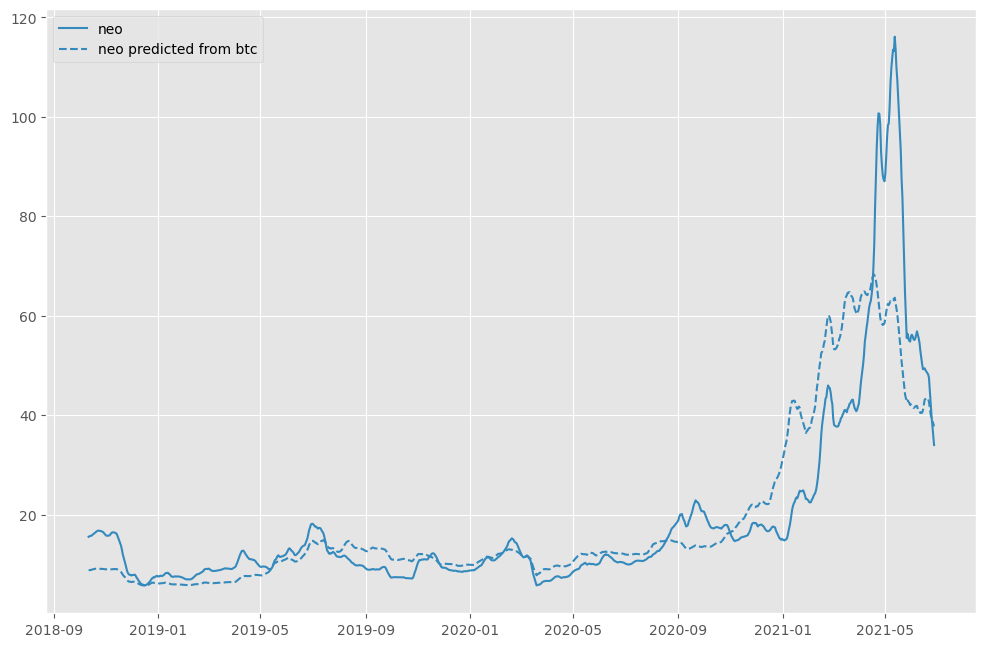

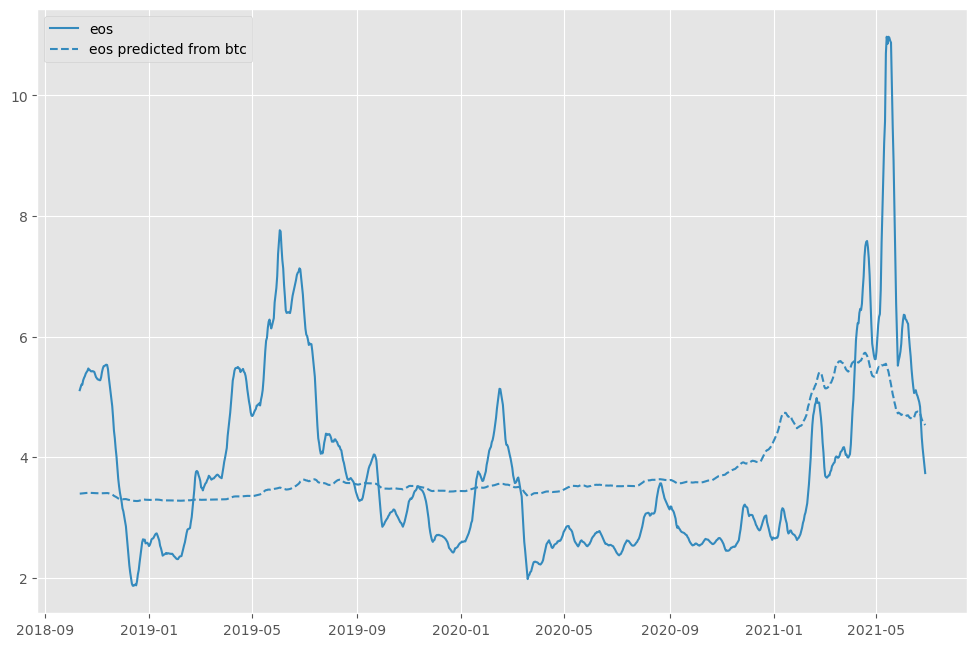

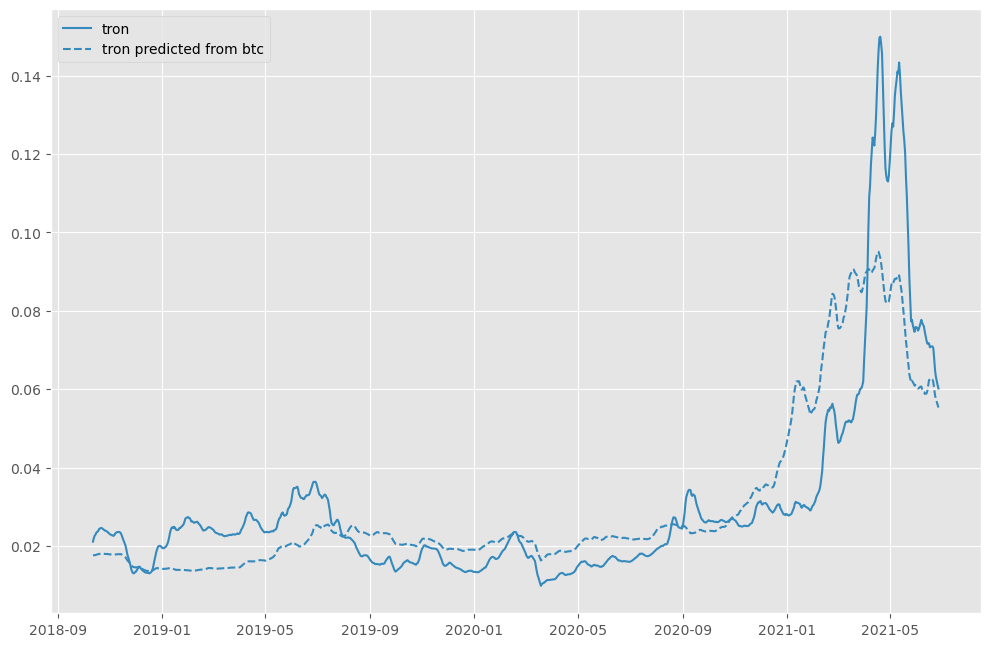

In [10]:
from sklearn.linear_model import LinearRegression

# split data into train and test
split_date = "2021-02-10"
train_df = assets_df[assets_df.index < datetime.strptime(split_date, '%Y-%m-%d').date()]
test_df = assets_df[assets_df.index >= datetime.strptime(split_date, '%Y-%m-%d').date()]

normalized_df=(assets_df-assets_df.mean())/assets_df.std()

for i, asset_name in enumerate(assets_df.columns):
    X = assets_df[["bitcoin"]]
    y = assets_df[asset_name]
    l = LinearRegression().fit(X, y)
    y_pred = l.predict(X)
    
#     if i % 2 == 0:
#         fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
#     plt.set_size_inches(12, 4)
#     axis = ax1 if i % 2 == 0 else ax2
    plt.plot(assets_df.index, y, f"-C1", label=asset_name)
    plt.plot(assets_df.index, y_pred, f"--C1", label=f"{asset_name} predicted from btc")
    plt.legend()
    plt.show()